## 1. A Gaussian Integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate!)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import poisson
from scipy.optimize import curve_fit

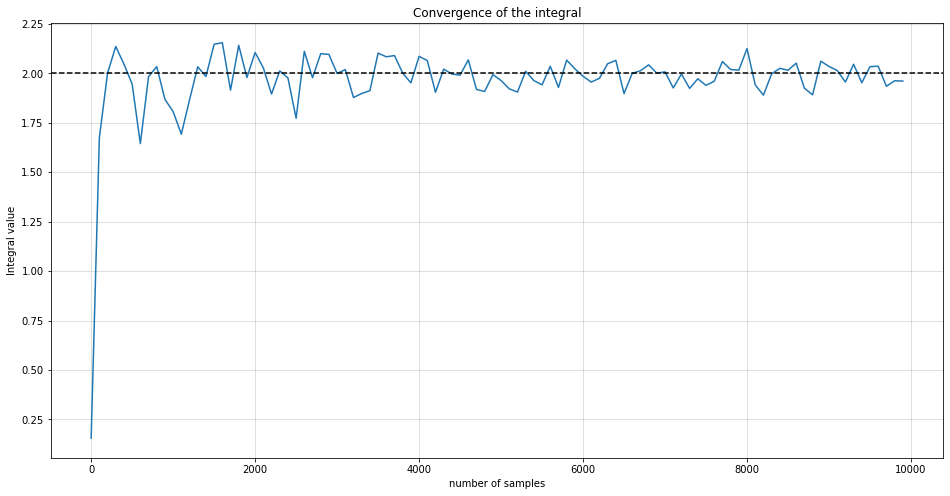

In [2]:
top = 1e4
dx = 1e2
tries = int(top/dx)

N = np.arange(1, top, tries)

sigma = 1

mc = np.zeros(tries)
result = 2*sigma**4

for i in range(len(N)):
    x = np.abs(np.random.normal(0, sigma, int(N[i])))
    mc[i] = (1/N[i]) *sigma*np.sqrt(np.pi/2)*np.sum(x**3) 
    
plt.figure(figsize=(16, 8))
plt.xlabel("number of samples")
plt.ylabel("Integral value")

plt.grid(alpha = 0.5)
plt.title("Convergence of the integral")
plt.plot(N, mc, label = 'MC integration result')
plt.axhline(result, color="black", linestyle="--", label = 'true value')

plt.show()


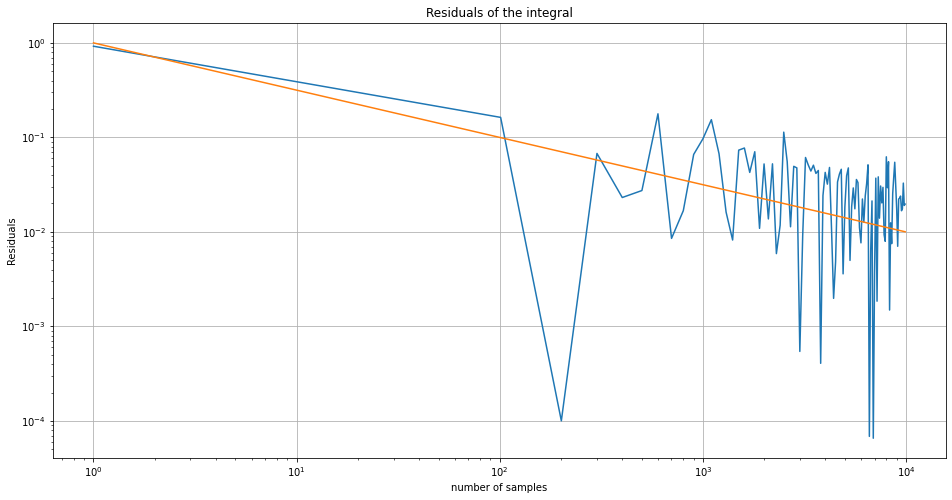

In [3]:
#residual

plt.figure(figsize=(16, 8))
plt.xlabel("number of samples")
plt.ylabel("Residuals")
plt.plot(N, np.abs((mc-result))/result)
plt.plot(N, N**(-1/2))
plt.title("Residuals of the integral")
plt.loglog()
plt.grid()
plt.show()

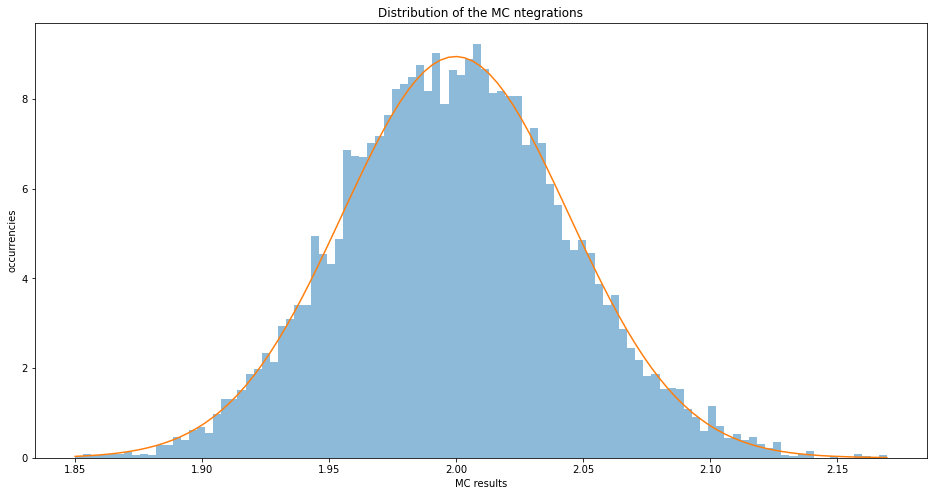

1.9997247033594845


In [4]:
n_samples = 1e4

run = int(1e4)
mc_integral = np.zeros(run)

for i in range(run):
    x = np.abs(np.random.normal(0, sigma, int(n_samples)))
    mc_integral[i] = (1/n_samples) *sigma*np.sqrt(np.pi/2)*np.sum(x**3)

plt.figure(figsize=(16, 8))
plt.xlabel("MC results")
plt.ylabel("occurrencies")    
_, bins, _ = plt.hist(mc_integral, 100, density=1, alpha=0.5)
mu, sigma = scipy.stats.norm.fit(mc_integral)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.title("Distribution of the MC ntegrations")
plt.plot(bins, best_fit_line)

plt.show()
print(mu)

## 2. Kicking horses

A famous early application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by Bortkiewicz in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)


In [5]:
deaths = np.array([0,1,2,3,4])
groups = np.array([109, 65, 22, 3, 1])
tot = np.sum(groups)
occ = groups/tot

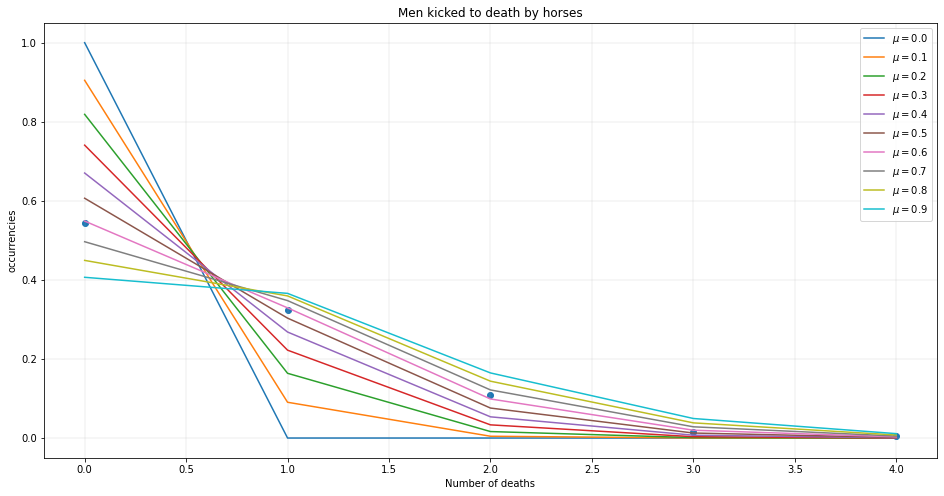

In [6]:
mu = np.arange(0, 1, 0.1)
x_pois = np.arange(0, 4, 0.1)    
plt.figure(figsize=(16, 8))

for i in range(len(mu)): 
    plt.plot(deaths, poisson(mu[i]).pmf(deaths),label = r'$\mu = $' + str('%.1f' % mu[i]))
    plt.legend(loc = 'best')
    plt.grid(which="both", linestyle='-', linewidth = 0.2)

plt.title("Men kicked to death by horses")
plt.xlabel("Number of deaths")
plt.ylabel("occurrencies")   
plt.scatter(deaths, occ)
plt.show()


computed mean = 0.6100000000000001


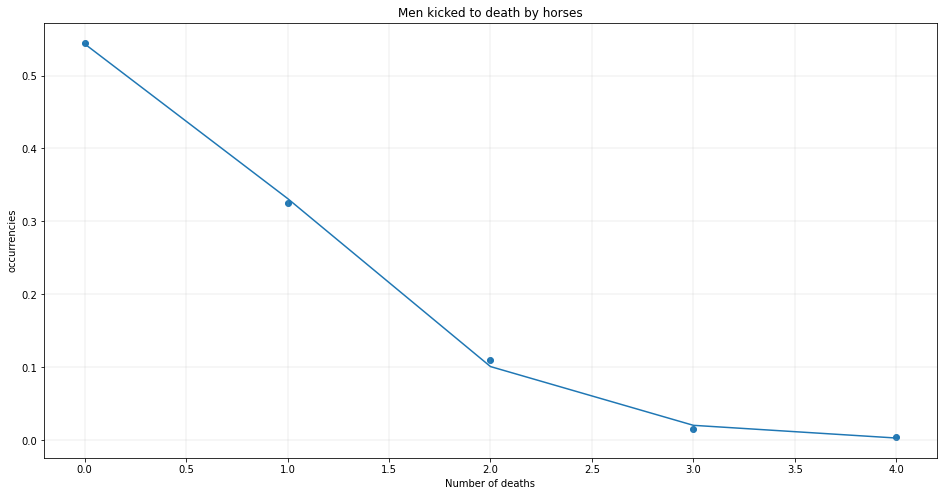

In [7]:
mean = np.average(deaths, weights = occ)
print("computed mean = " + str(mean))

plt.figure(figsize=(16, 8))
plt.scatter(deaths, occ)
plt.plot(deaths, poisson(mean).pmf(deaths))
plt.title("Men kicked to death by horses")
plt.xlabel("Number of deaths")
plt.ylabel("occurrencies")   
plt.grid(which="both", linestyle='-', linewidth = 0.2)
plt.show()
